# Preliminary work

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
import pandas as pd
import os
from skimage.transform import resize

In [2]:
 # Clip size
width = 30; height = 40

In [3]:
def create_bb_database(fig_flag = True, store_flag = True, sized_flag = True):
    
    # Works only with the data sent by James and Claire
    # (structure and file organisation)
    # THIS NEEDS TO BE DONE ONLY ONCE
    
    im_folders = ['TL1_Images_001_completed-20211101T225032Z-001\TL1_Images_001_completed', \
        'TL1_Images_002_completed-20211101T225019Z-001\TL1_Images_002_completed', \
        'TL1_Images_003_completed-20211101T225000Z-001\TL1_Images_003_completed', \
        'TL1_Images_004_completed-20211101T224942Z-001\TL1_Images_004_completed', \
        'TL1_Images_005_completed-20211101T224919Z-001\TL1_Images_005_completed', \
        'TL1_Images_006_completed-20211101T224858Z-001\TL1_Images_006_completed']

    bb_files = [im_folders[0]+'\labels_my-project-name_2021-10-27-06-32-35.csv', \
        im_folders[1]+'\labels_my-project-name_2021-10-27-11-03-59.csv', \
        im_folders[2]+'\labels_my-project-name_2021-10-28-01-24-54.csv', \
        im_folders[3]+'\labels_my-project-name_2021-10-27-02-06-20.csv', \
        im_folders[4]+'\labels_my-project-name_2021-10-28-04-54-35.csv', \
        im_folders[5]+'\labels_my-project-name_2021-10-27-03-40-39.csv']
    
    # Create a folder to store the database of clips
    if not(os.path.isdir('BirdClips')):
        os.mkdir('BirdClips')
        
    u = {'GL','GN','RG','SC','UN'} # labels
    
    if 'BB' in locals():
        del BB
    
    # Create subfolders to store the database of clips
    for d in u:
        if not(os.path.isdir('BirdClips/'+d)):
            os.mkdir('BirdClips/'+d)

    if fig_flag:
        k = 0
        plt.figure(figsize = (10,10))

    for i in range(len(bb_files)):
        
        bb_file = bb_files[i]
        im_folder = im_folders[i]
        bb = pd.read_csv(bb_file, header = None)
        bb = bb.to_numpy()
        print('Folder ',i+1, ' Bounding box count = ', len(bb))
        
        for j in range(len(bb)): # go through each BB
            label = bb[j,0]
            filename = im_folder + '/' + bb[j,5]
            im = mpimg.imread(filename)
            im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # convert to grey
            
            if sized_flag:
                # Crop a precpecified area
                bb_centre = [bb[j,2]+bb[j,4]/2,bb[j,1]+bb[j,3]/2]
                row_start = np.round(np.max([1,bb_centre[0]-height/2])).astype(int)
                row_end = np.round(np.min([im.shape[0],row_start+height])).astype(int)
                col_start = np.round(np.max([1,bb_centre[1]-width/2])).astype(int)
                col_end = np.round(np.min([im.shape[1],col_start+width])).astype(int)                                 
                clip = im[row_start:row_end,col_start:col_end]
                clip = resize(clip,(height,width))
            else:
                clip = im[bb[j,2]:bb[j,2]+bb[j,4],bb[j,1]:bb[j,1]+bb[j,3]]
            
            
            if fig_flag:
                if j <= 4:
                    k = k + 1
                    plt.subplot(6,5,k)
                    plt.imshow(resize(clip, (50, 50)),cmap = 'gray')
                    plt.axis('Off')
            if store_flag:
                to_save = 'BirdClips/' + label + '/clip_' + str(i+1) + '_' + str(j+1)+'_'+bb[j,5]
                mpimg.imsave(to_save, clip, cmap = 'gray')
                bb[j,5] = filename
                if 'Clip_files' in locals(): 
                    Clip_files.append(to_save)
                else:
                    Clip_files = [to_save]
                

        if store_flag:
            if 'BB' in locals(): # create one large file with all annotations
                BB = np.append(BB,bb,axis = 0)
            else:
                BB = bb
    
    
    # Remove an outlier
    outlier1 = np.where(BB[:,3]>150)
    BB = np.delete(BB,outlier1[0],axis = 0)  
    Clip_files = np.delete(Clip_files,outlier1[0],axis = 0)  

    
    if store_flag:
    # Save the Overall file with bounding boxes
        zz = pd.DataFrame (BB)
        zz.to_csv('Overall_BB.csv', header = False, index = False)
        Clip_files = np.array(Clip_files)
        vv = pd.DataFrame (np.reshape(Clip_files,(-1,1)))
        vv.to_csv('Clip_files.csv', header = False, index = False)

    if fig_flag:
        plt.show()

    

Folder  1  Bounding box count =  338
Folder  2  Bounding box count =  154
Folder  3  Bounding box count =  555
Folder  4  Bounding box count =  577
Folder  5  Bounding box count =  706
Folder  6  Bounding box count =  663


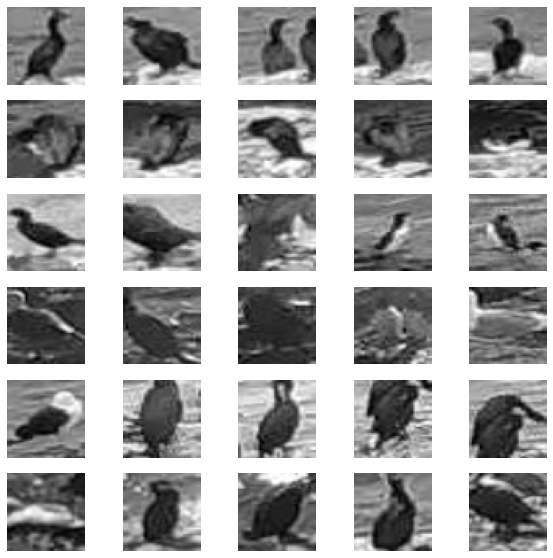

In [4]:
# Create database of clips, a single BB file, and a montage of the first 5 clips from each folder

create_bb_database(fig_flag = True, store_flag = True, sized_flag = True) # Needs to be done only once


     Minx   Maxx   Avrx   Miny   Maxy   Avry   MinA   MaxA   AvrA   [Number]
----------------------------------------------------------------------------
GL     13     72     33     14     47     26    255   2340    865    308  

GN     34     34     34     25     25     25    850    850    850      1  

RG      5     53     14      6     49     19     60   1127    286    908  

SC      8     99     27      9     62     34    108   5060    979   1762  

UN     12     40     25     13     34     23    247   1190    621     13  

----------------------------------------------------------------------------
All     5     99     24      6     62     29     60   5060    755   2992  


Table note: x, y, Area


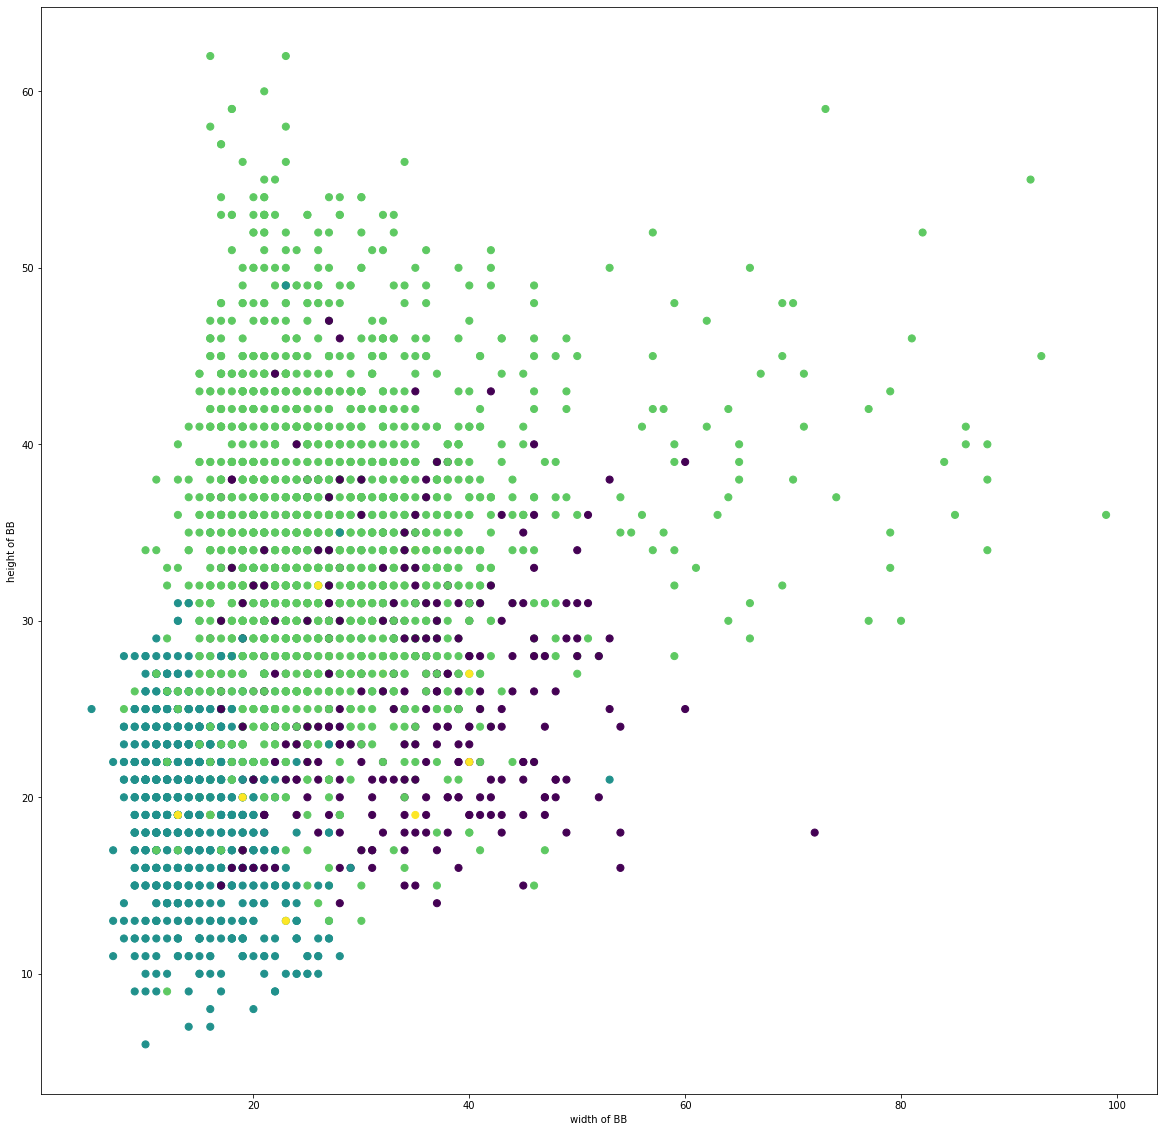

In [5]:
# Get some stats about the bounding boxes
BB = pd.read_csv('Overall_BB.csv', header = None)
BB = BB.to_numpy()

u = ['GL','GN','RG','SC','UN'] # labels
bb_sizes = np.zeros((len(u),10))

for i in range(len(u)):
    index = np.where(BB[:,0] == u[i]) # find all bounding boxes for this class label
    ar = BB[index,3]*BB[index,4]
    bb_sizes[i] = [np.min(BB[index,3]),np.max(BB[index,3]),np.mean(BB[index,3]), \
        np.min(BB[index,4]),np.max(BB[index,4]),np.mean(BB[index,4]), \
        np.min(ar),np.max(ar),np.mean(ar), len(index[0])]
    
    BB[index,0] = i # convert labels to numerical

ar = BB[:,3]*BB[:,4]
bb_total = [np.min(BB[:,3]),np.max(BB[:,3]),np.mean(BB[:,3]), \
    np.min(BB[:,4]),np.max(BB[:,4]),np.mean(BB[:,4]), \
    np.min(ar),np.max(ar),np.mean(ar),np.sum(bb_sizes[:,-1])]

print('     Minx   Maxx   Avrx   Miny   Maxy   Avry   MinA   MaxA   AvrA   [Number]')
print('----------------------------------------------------------------------------')
for i in range(len(u)):
    print('%2s ' % u[i], end =" ")
    for j in range(10):
        print('%5i ' % bb_sizes[i,j], end=" ")
    print('\n')
print('----------------------------------------------------------------------------')

print('All', end =" ")
for j in range(10):
    print('%5i ' % bb_total[j], end=" ")
print('\n')

print('\nTable note: x, y, Area')


plt.figure(figsize=(20,20))
plt.scatter(BB[:,3],BB[:,4],c = BB[:,0], s = 50)
plt.xlabel('width of BB')
plt.ylabel('height of BB')
plt.show()

Labels = BB[:,0] # needed for later
np.savetxt("Clip_labels.csv", Labels, delimiter=",")

Question here: How shall we decide on the size of the bounding boxes to check? Random match to the database? Average (class or overall?) Mode of the histogram? 

In [6]:
def choose_threshold(im):
    # Choose a valley between the two modes of the histogram. The histogram is bimodal: "water" and "island"
    # Smoothing function: savgol_filter(x, window_length, polyorder, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=0.0)
    
    grey_image = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    histogram,_ = np.histogram(grey_image.ravel(),256,[0,256])
    
    histogram = savgol_filter(histogram.ravel(), 71, 3) # window size 51, polynomial order 3
    histogram = savgol_filter(histogram.ravel(), 71, 3) # window size 51, polynomial order 3
    peaks,stats = find_peaks(histogram.ravel(), height = 0.3)
    z = stats["peak_heights"]
    peak1 = np.argmax(z)
    valleys,_ = find_peaks(-histogram.ravel(), -z[peak1])
    vs = valleys[valleys<peaks[peak1]]
    
    
    plt.figure()
    plt.subplot(121)
    plt.plot(histogram,'k-') 
    plt.plot(peaks,histogram[peaks], 'ko')
    plt.plot(peaks[peak1],histogram[peaks[peak1]],'ro', mfc = "none", mew = 0.8, ms = 12)
    plt.title('Histogram')
    
    plt.subplot(122)
    plt.plot(-histogram)
    plt.plot(valleys,-histogram[valleys],'bo')
    thr = vs[-1]
    plt.plot(thr,-histogram[thr],'bo', mfc = "none", mew = 0.8, ms = 12)
    plt.title('Threshold =' + str(thr))
 
    return thr

(400, 1600, 3)


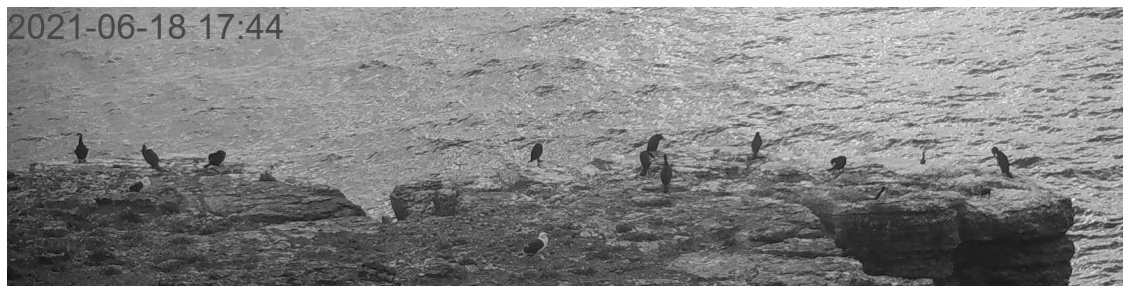

In [7]:
# Image manipulation

examplefile = 'SOS_PUF_2021_Camera1_202106181744.jpg'
examplefolder = 'TL1_Images_006_completed-20211101T224858Z-001/TL1_Images_006_completed/'
exampleim = mpimg.imread(examplefolder+examplefile)
print(exampleim.shape)
grey_image = cv2.cvtColor(exampleim, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (20,10))
plt.imshow(grey_image, cmap="gray")
plt.axis('off')
plt.show()

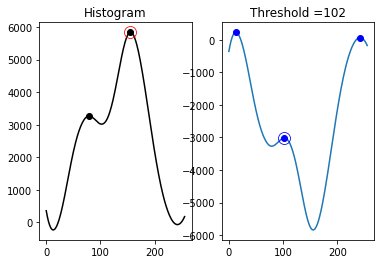

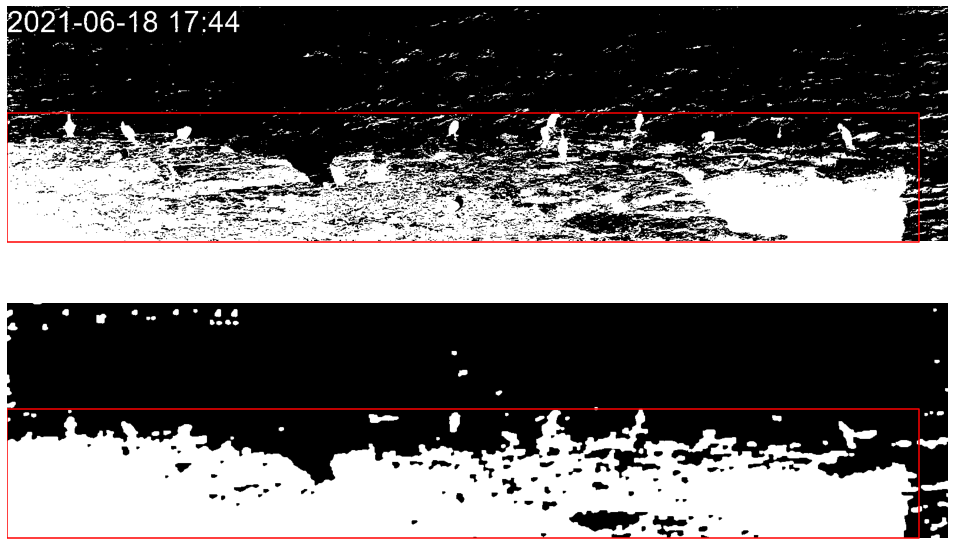

In [8]:
# Where shall we look for bounding boxes?
thr = choose_threshold(exampleim)
segmented = cv2.threshold(grey_image,thr, 255,cv2.THRESH_BINARY_INV)[1]

# Find both island and birds
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6), (2, 2))
island_and_birds_mask = cv2.morphologyEx(segmented, cv2.MORPH_CLOSE, element)
island_and_birds_mask = cv2.morphologyEx(island_and_birds_mask, cv2.MORPH_OPEN, element)
island_and_birds_mask = cv2.morphologyEx(segmented, cv2.MORPH_CLOSE, element)
island_and_birds_mask = cv2.morphologyEx(island_and_birds_mask, cv2.MORPH_OPEN, element)

nb_components_i, output_i, stats_i, centroids_i = cv2.connectedComponentsWithStats(island_and_birds_mask, connectivity=8)
# nb_components >>> number of components
# output >>> image with labels
# stats >>> [x,y,w,h,num_pixels]
# centroids >>>

# Find the component corresponding to the island - the second largest
index_largest = np.argmax(stats_i[:,-1])
stats_i[index_largest,-1] = 0 # mask the largest
index_island = np.argmax(stats_i[:,-1])
bb_island = stats_i[index_island,:]
x,y,w,h,sz = bb_island
xisland = [x,x+w,x+w,x,x] # plotting coordinates for the island bounding box
yisland = [y,y,y+h,y+h,y]
 
f, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].imshow(segmented, cmap="gray")
axs[0].axis('off')
axs[0].plot(xisland,yisland,'r-')
axs[1].imshow(island_and_birds_mask, cmap="gray")
axs[1].axis('off')
axs[1].plot(xisland,yisland,'r-')
plt.show()

# Prepare a data set

In [9]:
# Create the database of true BB (positives)

CF = pd.read_csv('Clip_files.csv', header = None)
CF = CF.to_numpy()

if 'Data' in locals():
    del Data

for i in range(len(CF)):
    im = mpimg.imread(CF[i][0]) # read clip
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # convert to grey
    data_row = np.reshape(im,(1,-1))
    
    # Create array Data
    # Labels have been created already in a cell above
    if 'Data' in locals(): 
        Data = np.append(Data,data_row,axis = 0)
    else:
        Data = data_row
        
print(Data.shape)
print(Labels.shape)


(2992, 1200)
(2992,)


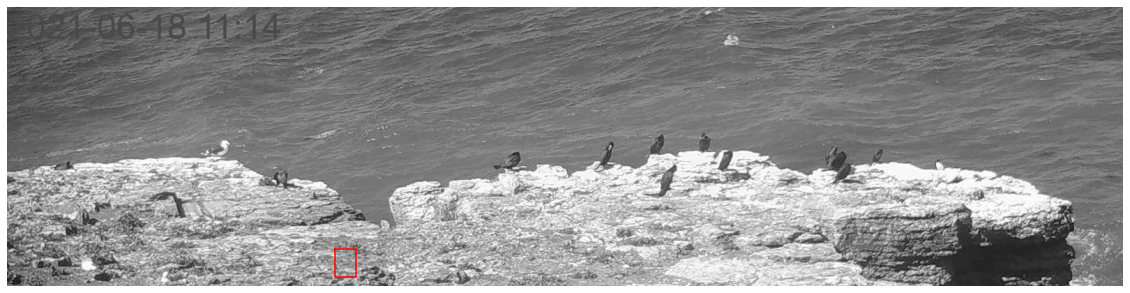

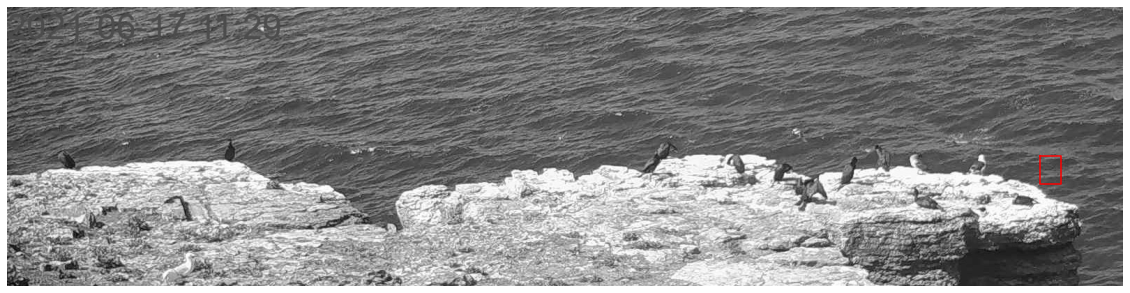

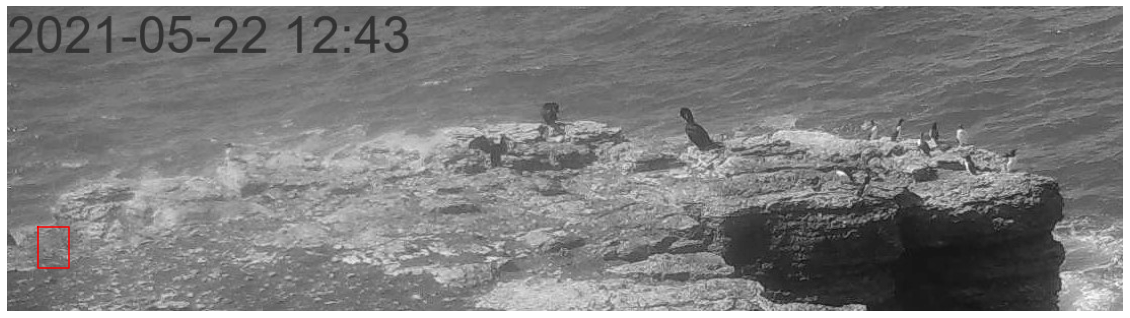

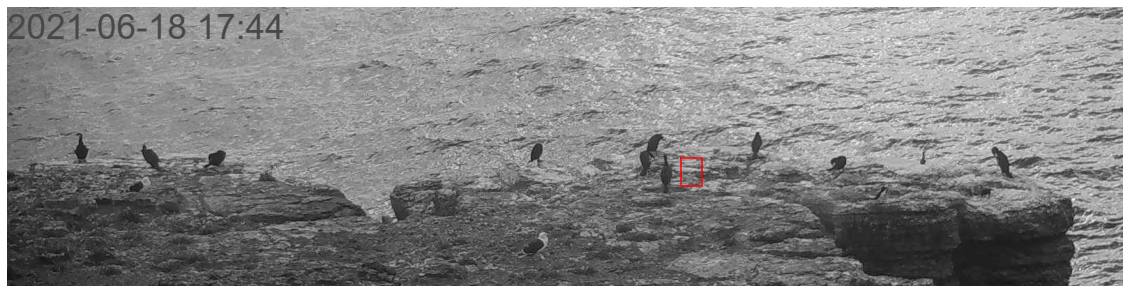

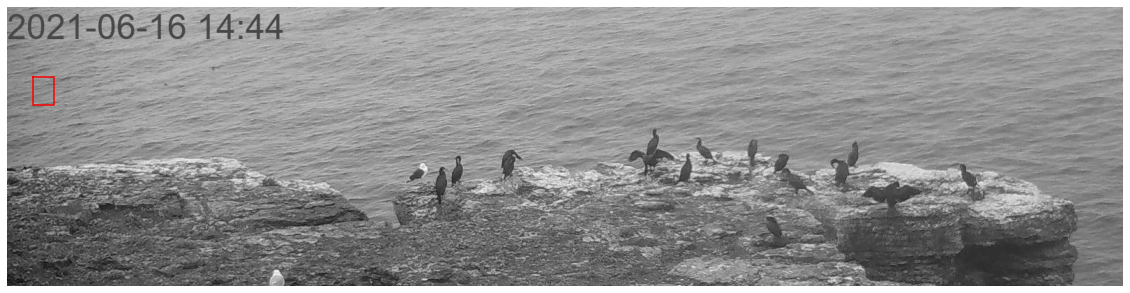

(8976, 1200)
(8976,)


In [10]:
# Add random BBs (negatives)
N = len(Data)*2 # number of negatives

BB = pd.read_csv('Overall_BB.csv', header = None)
BB = BB.to_numpy()

# Here we use the bottom part (3/4) of the image for the negative examples.

for i in range(N):
    
    # Pick a random image
    im_index = np.random.randint(len(BB), dtype=int)
  
    im = mpimg.imread(BB[im_index,5]) # read clip
    im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # convert to grey
    
    # Pick a random point in the range of interest to be the centre of a negative example
    cx = np.random.randint(low = width/2, high = im.shape[1]-width/2, dtype=int)
    cy = np.random.randint(low = im.shape[0]*0.25+height/2, high = im.shape[0]-height/2, dtype=int)
    row_start = np.round(cy-height/2).astype(int)
    row_end = np.round(row_start+height).astype(int)
    col_start = np.round(cx-width/2).astype(int)
    col_end = np.round(col_start+width).astype(int)                                 
    neg_clip = im[row_start:row_end,col_start:col_end]
    neg_clip = resize(neg_clip,(height,width))

    if i <=4:
        plt.figure(figsize=(20,10))
        plt.imshow(im, cmap = 'gray')
        plt.axis('Off')
        plt.plot([col_start,col_start,col_end,col_end,col_start],[row_start,row_end,row_end,row_start,row_start],'r-')
        plt.show()
    
    neg_data_row = np.reshape(neg_clip,(1,-1))

    Data = np.append(Data,neg_data_row,axis = 0)
    Labels = np.append(Labels,[9],axis = 0)

print(Data.shape)
print(Labels.shape)
    

In [11]:
# Reduce data dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components = 30)
DataPCA = pca.fit_transform(Data)

print(Data.shape)

# Save the PCA-transformed data
ClipsPCA = np.hstack((DataPCA,np.reshape(Labels,(-1,1))))
np.savetxt("ClipsPCA30.csv", ClipsPCA, delimiter=",") 

#plt.figure(figsize=(20,20))
#plt.scatter(DataPCA[:,0],DataPCA[:,1],c = Labels, s = 12)
#plt.show()


(8976, 1200)


In [12]:
import pickle as pk

pk.dump(pca, open("pca.pkl","wb")) # SAVE THE TRANSFORMATION

# later reload the pickle file
# pca_reload = pk.load(open("pca.pkl",'rb'))
# result_new = pca_reload .transform(X)